## Procesamiento básico de un cubo sísmico

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import segyio
import re

In [2]:
filename = "datos_sismicos/3X_75_PR.SGY"

### Funciones y utilidades

In [4]:
def parse_trace_headers(segyfile, n_traces):
    headers = segyio.tracefield.keys
    df = pd.DataFrame(index = range(1, n_traces + 1), columns = headers.keys())
    for k, v in headers.items():
        df[k] = segyfile.attributes(v)[:]
    return df

def parse_text_header(segyfile):
    raw_header = segyio.tools.wrap(segyfile.text[0])
    cut_header = re.split(r'C ', raw_header)[1::]
    text_header = [x.replace('\n', ' ') for x in cut_header]
    text_header[-1] = text_header[-1][:-2]
    clean_header = {}
    i = 1
    for item in text_header:
        key = "C" + str(i).rjust(2, '0')
        i += 1
        clean_header[key] = item
    return clean_header

## Atributos básicos y análisis de headers

In [5]:
with segyio.open(filename, ignore_geometry = True) as f:
    n_traces = f.tracecount
    sample_rate = segyio.tools.dt(f) / 1000
    n_samples = f.samples.size
    twt = f.samples
    data = f.trace.raw[:]
    bin_headers = f.bin
    text_headers = parse_text_header(f)
    trace_headers = parse_trace_headers(f, n_traces)
f'Trace count: {n_traces}, Sample rate: {sample_rate} ms, Number of samples: {n_samples}'

'Trace count: 1592, Sample rate: 8.0 ms, Number of samples: 751'

In [6]:
bin_headers

{JobID: 1110580000, LineNumber: 3, ReelNumber: 1110579969, Traces: 1, AuxTraces: 0, Interval: 8000, IntervalOriginal: 0, Samples: 751, SamplesOriginal: 0, Format: 1, EnsembleFold: 1, SortingCode: 4, VerticalSum: 1, SweepFrequencyStart: 0, SweepFrequencyEnd: 0, SweepLength: 0, Sweep: 0, SweepChannel: 0, SweepTaperStart: 0, SweepTaperEnd: 0, Taper: 0, CorrelatedTraces: 0, BinaryGainRecovery: 1, AmplitudeRecovery: 4, MeasurementSystem: 0, ImpulseSignalPolarity: 0, VibratoryPolarity: 0, ExtAuxTraces: 65536, ExtSamples: 393216001, ExtSamplesOriginal: 131073, ExtEnsembleFold: 1, SEGYRevision: 0, SEGYRevisionMinor: 0, TraceFlag: 0, ExtendedHeaders: 0}

In [7]:
text_headers

{'C01': '  CLIENT/JOB ID    0 5 5 5 2 9 3 4 7 2 ',
 'C02': '  LINE  L3X ',
 'C03': '  REEL NO 751023083601   DAY-START OF REEL  23       YEAR 1975 ',
 'C04': '  INSTRUMENT: MFG TI          MODEL ASC ',
 'C05': '  DATA TRACES/RECORD0001      AUXILIARY TRACES/RECORD 0       CDP FOLD  0001 ',
 'C06': 'SAMPLE INTERNAL 0000008000 US  SAMPLES/TRACE  0751BITS/IN 1600 BYTES/SAMPLE 4 ',
 'C07': '  RECORDING FORMAT  STDI              FORMAT THIS REEL SEG Y1 ',
 'C08': '  SAMPLE CODE: FLOATING PT ',
 'C09': '  GAIN TYPE:   FLOATING PT C C C C C C C C C C C ',
 'C10': '  PROCESSING: ',
 'C11': '  PROCESSING: ',
 'C12': '  FIELD TAPE PROCESSING MACHINE NUMBER IS:    TIMAP2 ',
 'C13': '  INPUT TAPE FORMAT IS :          STDI ',
 'C14': '  TMIN REQUESTED THIS REEL  00000000      TMAX REQUESTED THIS REEL  00006000 ',
 'C15': '  INITIAL CHANNEL REQUESTED   0001    NUMBER OF CHANNELS REQUESTED  0001 ',
 'C16': '  DELTA 0008 MILLIVOLT LEVEL  000000  TYPE INPUT  0001 ',
 'C17': '  TRACE HEADER INFORMATION 

In [11]:
trace_headers.head()

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,TraceIdentifier,ScalarTraceHeader,SourceType,SourceEnergyDirectionMantissa,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit,UnassignedInt1,UnassignedInt2
1,1,1,11,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2,2,11,0,0,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,3,3,11,0,0,3,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,4,4,11,0,0,4,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,5,5,11,0,0,5,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
trace_headers.columns

Index(['TRACE_SEQUENCE_LINE', 'TRACE_SEQUENCE_FILE', 'FieldRecord',
       'TraceNumber', 'EnergySourcePoint', 'CDP', 'CDP_TRACE',
       'TraceIdentificationCode', 'NSummedTraces', 'NStackedTraces', 'DataUse',
       'offset', 'ReceiverGroupElevation', 'SourceSurfaceElevation',
       'SourceDepth', 'ReceiverDatumElevation', 'SourceDatumElevation',
       'SourceWaterDepth', 'GroupWaterDepth', 'ElevationScalar',
       'SourceGroupScalar', 'SourceX', 'SourceY', 'GroupX', 'GroupY',
       'CoordinateUnits', 'WeatheringVelocity', 'SubWeatheringVelocity',
       'SourceUpholeTime', 'GroupUpholeTime', 'SourceStaticCorrection',
       'GroupStaticCorrection', 'TotalStaticApplied', 'LagTimeA', 'LagTimeB',
       'DelayRecordingTime', 'MuteTimeStart', 'MuteTimeEND',
       'TRACE_SAMPLE_COUNT', 'TRACE_SAMPLE_INTERVAL', 'GainType',
       'InstrumentGainConstant', 'InstrumentInitialGain', 'Correlated',
       'SweepFrequencyStart', 'SweepFrequencyEnd', 'SweepLength', 'SweepType',
       'Swee

In [12]:
trace_headers.loc[1, 'FieldRecord']

11

Text(0, 0.5, 'Trace sequence number within file')

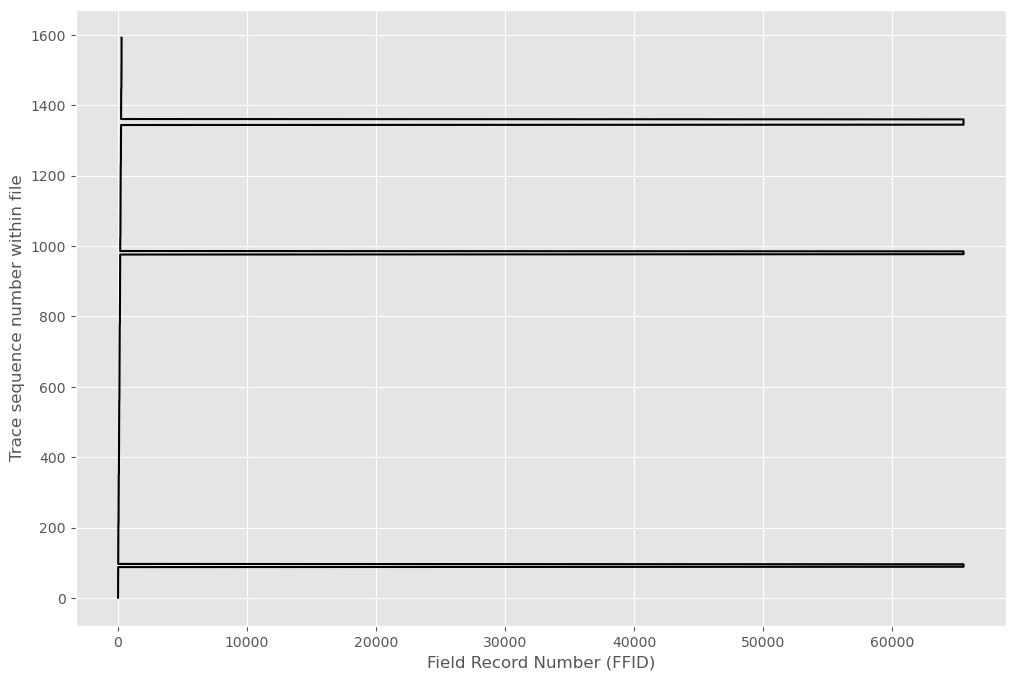

In [13]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(trace_headers['FieldRecord'], trace_headers['TRACE_SEQUENCE_FILE'], '-k')
ax.set_xlabel('Field Record Number (FFID)')
ax.set_ylabel('Trace sequence number within file')


## Plotear una sección

In [14]:
clip_percentile = 99
vm = np.percentile(data, clip_percentile)
f'El percentil 99 de los datos es {vm}, y la amplitud máxima es {np.max(data)}'

'El percentil 99 de los datos es 1802.4452661132814, y la amplitud máxima es 1091224.0'

Text(0.5, 1.0, 'datos_sismicos/3X_75_PR.SGY')

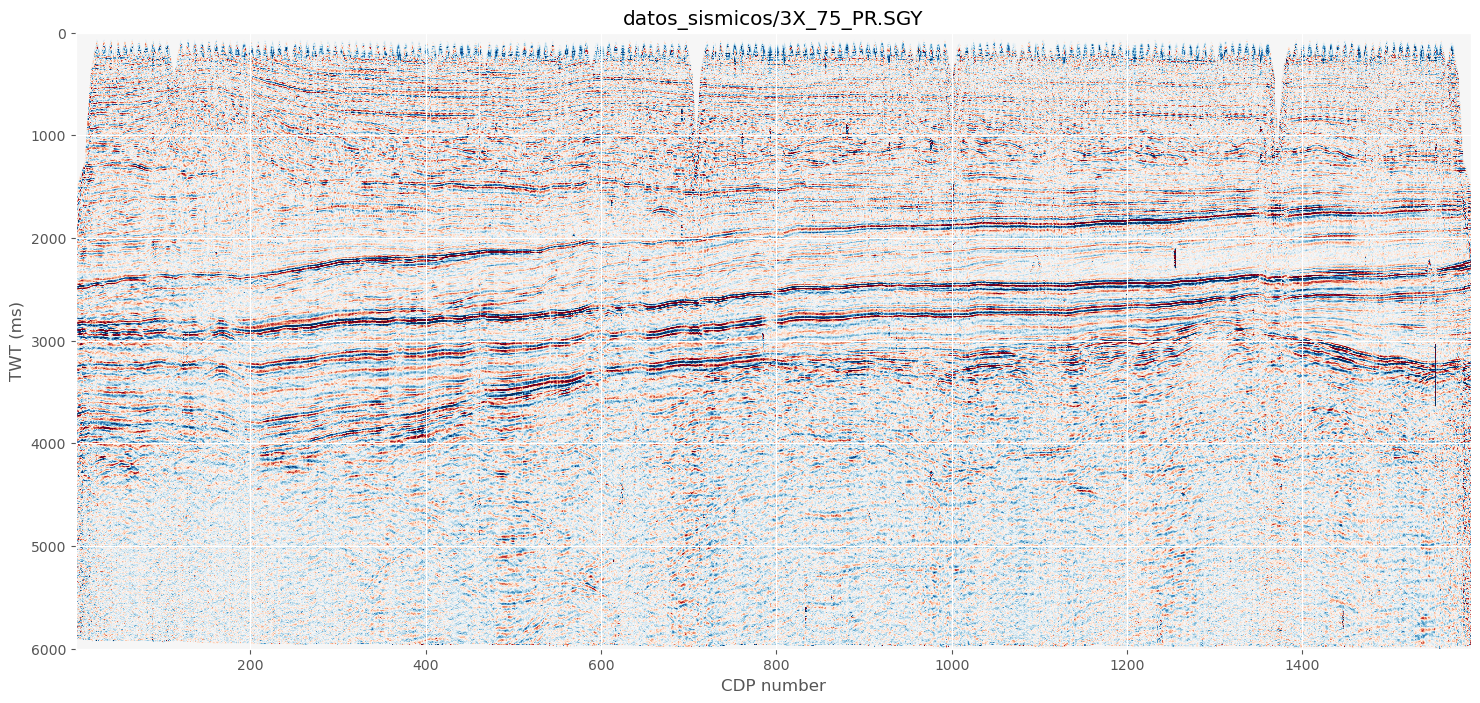

In [15]:
fig = plt.figure(figsize = (18, 8))
ax = fig.add_subplot(1, 1, 1)
extent = [1, n_traces, twt[-1], twt[0]]
ax.imshow(data.T, cmap = 'RdBu', aspect = 'auto', vmin = -vm, vmax = vm, extent = extent)
ax.set_xlabel('CDP number')
ax.set_ylabel('TWT (ms)')
ax.set_title(f'{filename}')